<a href="https://colab.research.google.com/github/202422/Delivery-Duration-Prediction/blob/main/Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("/content/historical_data.csv")
df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [5]:
(df.isna().sum()/df.shape[0]).sort_values(ascending = False)

,0
total_busy_dashers,0.082369
total_outstanding_orders,0.082369
total_onshift_dashers,0.082369
store_primary_category,0.024110
order_protocol,0.005040
market_id,0.004999
estimated_store_to_consumer_driving_duration,0.002664
actual_delivery_time,0.000035
subtotal,0.000000
total_items,0.000000


In [7]:
df_without_miss = df.dropna()
df_without_miss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175777 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   created_at                                    175777 non-null  object 
 2   actual_delivery_time                          175777 non-null  object 
 3   store_id                                      175777 non-null  int64  
 4   store_primary_category                        175777 non-null  object 
 5   order_protocol                                175777 non-null  float64
 6   total_items                                   175777 non-null  int64  
 7   subtotal                                      175777 non-null  int64  
 8   num_distinct_items                            175777 non-null  int64  
 9   min_item_price                                175777 

In [8]:
df_without_miss.duplicated().sum()

np.int64(0)

In [9]:
df_without_useless_col = df_without_miss.drop(columns = ["store_id", "market_id"], axis = 0)
df_without_useless_col

,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,2015-02-06 22:24:17,2015-02-06 23:27:16,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2015-02-10 21:49:25,2015-02-10 22:56:29,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
8,2015-02-16 00:11:35,2015-02-16 00:38:01,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
14,2015-02-12 03:36:46,2015-02-12 04:14:39,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0
15,2015-01-27 02:12:36,2015-01-27 03:02:24,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,2015-02-17 00:19:41,2015-02-17 01:24:48,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0
197424,2015-02-13 00:01:59,2015-02-13 00:58:22,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0
197425,2015-01-24 04:46:08,2015-01-24 05:36:16,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0
197426,2015-02-01 18:18:15,2015-02-01 19:23:22,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0


In [14]:
num_cols = ["total_items",	"subtotal",	"num_distinct_items",	"min_item_price",	"max_item_price",	"total_onshift_dashers",	"total_busy_dashers",
            "total_outstanding_orders",	"estimated_order_place_duration",	"estimated_store_to_consumer_driving_duration"]

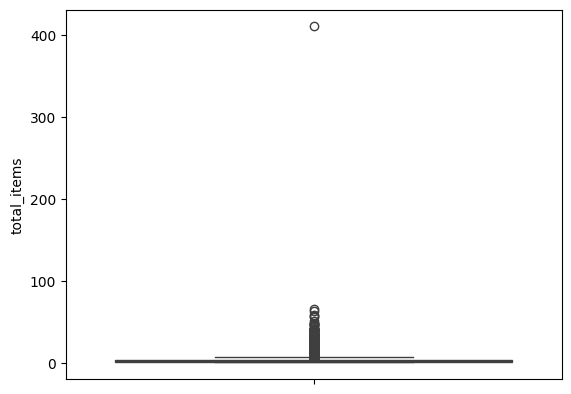

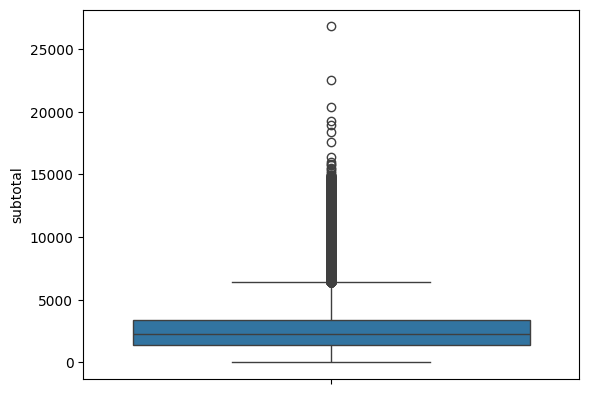

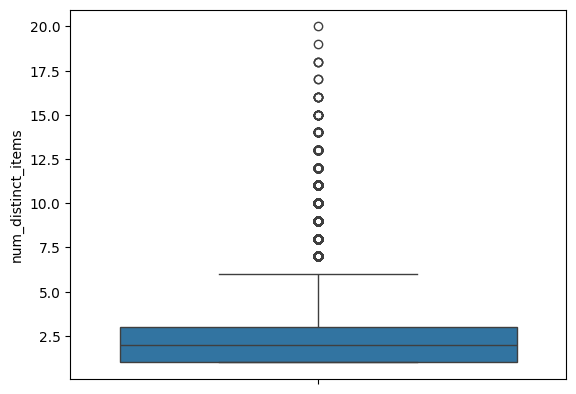

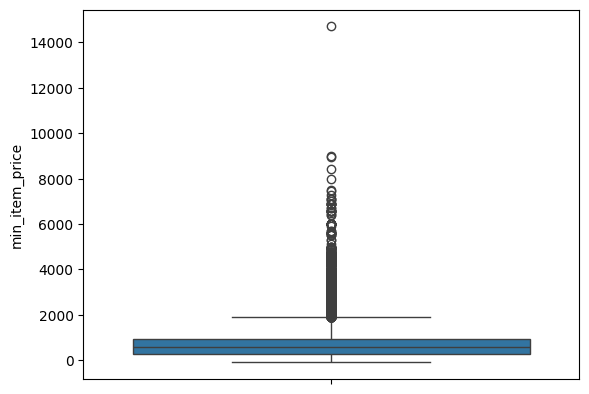

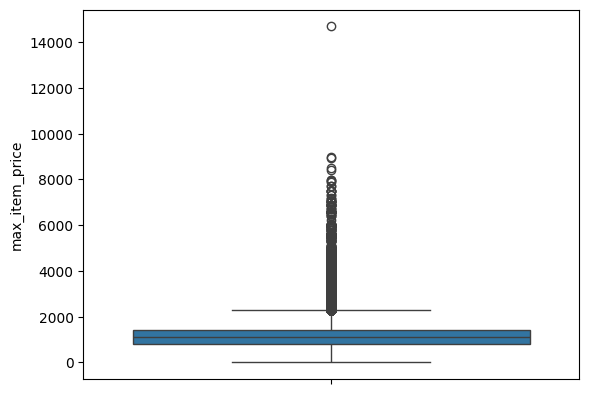

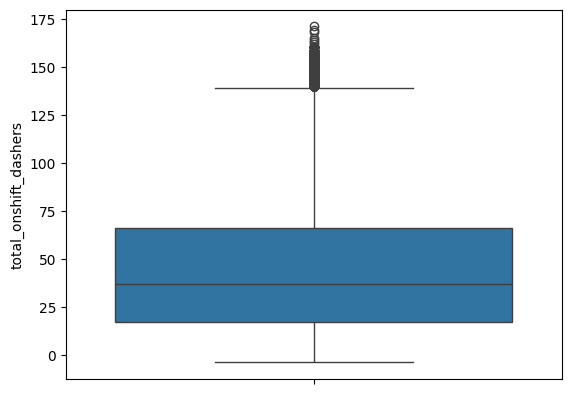

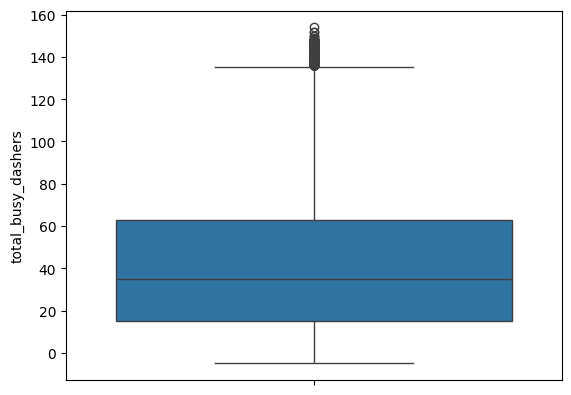

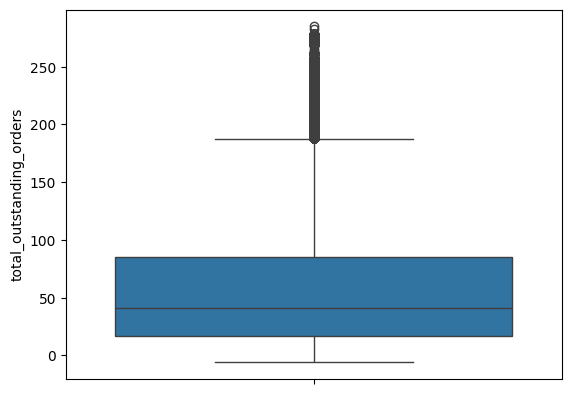

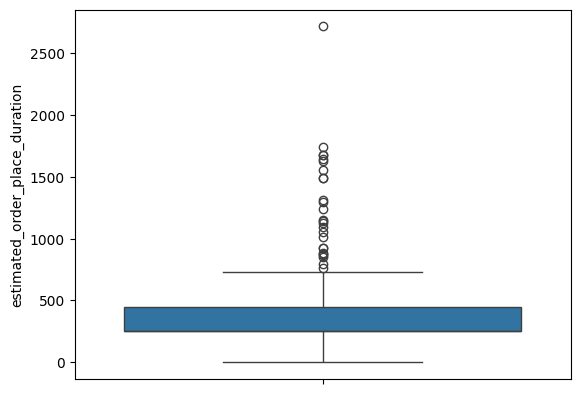

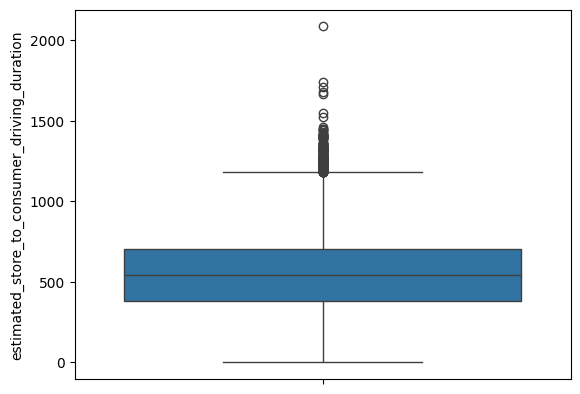

<Figure size 640x480 with 0 Axes>

In [16]:
for col in num_cols:
  sns.boxplot(df_without_useless_col[col])
  plt.figure()

In [19]:
zscore_val = stats.zscore(df_without_useless_col[num_cols])
zscore_val

array([[ 0.29731124,  0.40681905,  0.81500873, ..., -0.70603992,
         1.53883675,  1.43986296],
       [-0.82458356, -0.43592534, -1.03037745, ..., -1.06636   ,
         1.53883675,  0.65803136],
       [ 0.29731124,  1.13417145,  0.19988   , ..., -0.76293256,
         1.53883675, -1.17538661],
       ...,
       [ 0.67127617, -0.47092576,  0.19988   , ..., -0.34571983,
        -0.63274416,  1.13810339],
       [-0.82458356, -0.83241443, -1.03037745, ..., -0.87671785,
         1.53883675, -0.74103572],
       [ 0.29731124, -0.05037388,  0.81500873, ..., -0.66811149,
         1.53883675, -1.88406438]])

In [23]:
zscore_bool = (zscore_val<2).all(axis = 1)
zscore_bool

array([ True,  True,  True, ...,  True,  True,  True])

In [25]:
df_without_outlier = df_without_useless_col[zscore_bool]
df_without_outlier.reset_index(drop = True, inplace = True)
df_without_outlier

,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,2015-02-06 22:24:17,2015-02-06 23:27:16,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2015-02-10 21:49:25,2015-02-10 22:56:29,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,2015-02-16 00:11:35,2015-02-16 00:38:01,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
3,2015-02-12 03:36:46,2015-02-12 04:14:39,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0
4,2015-01-27 02:12:36,2015-01-27 03:02:24,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136477,2015-02-17 00:19:41,2015-02-17 01:24:48,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0
136478,2015-02-13 00:01:59,2015-02-13 00:58:22,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0
136479,2015-01-24 04:46:08,2015-01-24 05:36:16,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0
136480,2015-02-01 18:18:15,2015-02-01 19:23:22,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0


In [26]:
df_without_outlier.to_csv("data_processed.csv", index = False )